This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/THDDCGCaMP62/100404series/100405seriesintMB176Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)

In [5]:
DT=Ua['TSmean']

In [6]:
DT.shape

(24112, 176)

In [7]:
S1=DT.shape

In [8]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [9]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [10]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [11]:
DTvar.shape

(24112, 176)

open maps

In [12]:
import nibabel as nb

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/THDDCGCaMP62/100404series/100405seriesintMB176Smith0_4_60IC.nii


In [14]:
img1 = nb.load(filename2)

In [15]:
data = img1.get_data()

In [16]:
S=data.shape

In [17]:
S

(41, 26, 15, 176)

# Zscore maps

In [18]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [19]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [20]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [21]:
datao=data
Dmapso=Dmaps

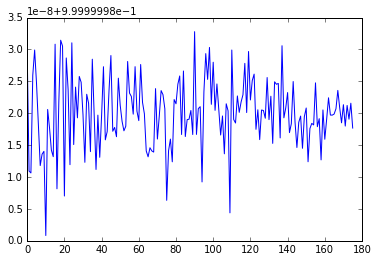

In [22]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [23]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [24]:
Dtemp=data[:,:,:,0]

In [25]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [26]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [27]:
DTvar.shape

(24112, 176)

In [28]:
S

(41, 26, 15, 176)

In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/THDDCGCaMP62/100404series/100404seriesXk.mat


In [33]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']
#Xk[1,:]=Ua['Walk']

In [34]:
Xk.shape

(24112, 6)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/THDDCGCaMP62/100404series/AsoTransformed.nii


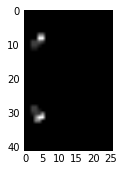

In [35]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

plt.imshow(Vmean,cmap=plt.cm.gray)

In [36]:
Xk=Xk.T

In [37]:
Xk.shape

(6, 24112)

In [38]:
Label_ICs=[]

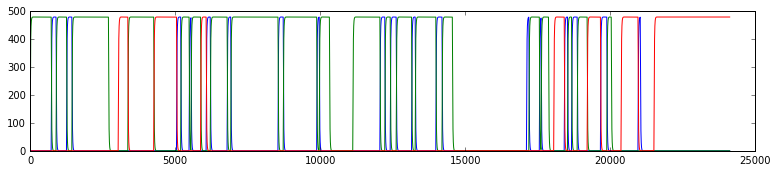

In [42]:
plt.plot(Xk[(range(3,6)),:].T)

In [ ]:
### Label_ICs=[]
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    plt.plot(Xk[3,:]/np.std(Xk[3,:])+0.5,color=(1,0,0))   
    plt.plot(Xk[4,:]/np.std(Xk[4,:])+0.5,color=(0,1,0))
    plt.plot(Xk[5,:]/np.std(Xk[5,:])+0.5,color=(0.5,0.5,0))    
    #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    
    plt.show()
    
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

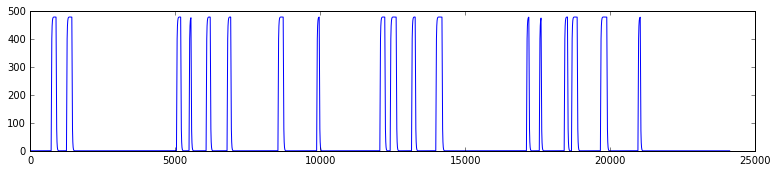

In [56]:
plt.plot(Xk[3,:])

In [43]:



#zip(range(S[3]),Label_ICs)

In [44]:
set(Label_ICs)

{'', 'alpha', 'beta', 'gamma'}

In [46]:
Xksmoothed=np.zeros(Xk.shape)

Xksmoothed[3,:]=np.convolve(Xk[3,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[4,:]=np.convolve(Xk[4,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[5,:]=np.convolve(Xk[5,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xkdff=Xk-Xksmoothed

In [47]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((3,S[3]))

In [48]:
from sklearn import linear_model

In [49]:
algorithm = linear_model.LinearRegression()

In [50]:
for j in range(S[3]):
    model = algorithm.fit(Xkdff[range(3,6),:].T, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(Xkdff[range(3,6),:].T,DT[:,j])

In [59]:
for i in range(S[3]):
    if Label_ICs[i]!='':
        print(Label_ICs[i], Betas[0,i]*10000)

('Alpha1_Gamma2', -0.54723687753156425)
('Gamma4', 0.87442981065524117)
('Gamma3', 1.1587739157747836)
('Betap2', 2.0413201265222627)
('Gamma3', 1.1736089126842131)
('Betap2', -3.2030429290409543)
('Gamma1', -0.10577683575359548)
('Beta2', 0.34781722783709623)
('Betap1', 0.049159500255733284)
('Betap2', -0.82837281582816302)
('Gamma4', 6.5960543496350974)
('Alpha2_Alphp2', 65.318203104034183)
('Alpha2_Alphap2', 1.1920628863508345)
('Gamma5', 1.3289772852377506)
('Gamma5', -12.950389307191598)
('Betap2', -1.1813428848847813)
('Alpha3', -0.82180967300770014)
('Betap2', -2.5040544154496009)
('Gamma4', 0.41170256171409136)
('Betap1', -0.31004105502059409)
('Beta1_Betap1', -0.77596009396280408)
('Gamma5', -1.0399070308727782)
('Gamma5', 0.10929957091724106)
('Gamma5', -2.9461569715414697)
('Beta1', 0.059488360305598988)
('Alphap3', 0.084438620278406956)
('Alphap3', -0.035190187667946973)
('Alpha1', 0.28768685047710929)
('Gamma1', -0.050391562685823968)


In [55]:
for i in range(S[3]):
    if Label_ICs[i]!='':
        print(Label_ICs[i], Rsq[:,i])

('Alpha1_Gamma2', array([ 0.08653803]))
('Gamma4', array([ 0.33969677]))
('Gamma3', array([ 0.51354923]))
('Betap2', array([ 0.21229193]))
('Gamma3', array([ 0.33104936]))
('Betap2', array([ 0.21715336]))
('Gamma1', array([ 0.01446704]))
('Beta2', array([ 0.10737468]))
('Betap1', array([ 0.01596101]))
('Betap2', array([ 0.12899872]))
('Gamma4', array([ 0.43716086]))
('Alpha2_Alphp2', array([ 0.07717476]))
('Alpha2_Alphap2', array([ 0.09897522]))
('Gamma5', array([ 0.19401563]))
('Gamma5', array([ 0.32785547]))
('Betap2', array([ 0.25469116]))
('Alpha3', array([ 0.11663654]))
('Betap2', array([ 0.09931033]))
('Gamma4', array([ 0.37712335]))
('Betap1', array([ 0.04749616]))
('Beta1_Betap1', array([ 0.37303982]))
('Gamma5', array([ 0.29313391]))
('Gamma5', array([ 0.07074086]))
('Gamma5', array([ 0.10092685]))
('Beta1', array([ 0.09195625]))
('Alphap3', array([ 0.14286865]))
('Alphap3', array([ 0.05731171]))
('Alpha1', array([ 0.10250902]))
('Gamma1', array([ 0.0688187]))


1
[ 0.60440529]
[  1.48149049e-04  -1.20482913e-05  -1.57655564e-06]
5
[ 0.45951915]
[ -2.26585909e-04   1.95832046e-05   2.33390292e-06]
6
[ 0.57852034]
[  8.51136119e-05  -1.74192621e-06  -8.31713863e-07]
8
[ 0.39823068]
[ -2.29627621e-04   1.21536934e-05   1.07895471e-06]
9
[ 0.20644194]
[ -2.75909587e-04   4.74332036e-05  -1.42405614e-05]
12
[ 0.27295523]
[  6.54380750e-06  -2.44484127e-06  -8.10175374e-08]
14
[ 0.12718678]
[ -7.40715566e-05   1.71051103e-05  -2.09201286e-06]
16
[ 0.56185344]
[  5.45564625e-05  -3.82499569e-06  -5.81210587e-07]
17
[ 0.04688873]
[ -4.95999634e-05  -2.76037343e-05  -3.74238155e-06]
18
[ 0.42579978]
[  3.49988551e-05  -1.84513620e-06   6.31309069e-07]
21
[ 0.28464056]
[ -3.94584867e-04   8.94166123e-05  -4.72376330e-05]
22
[ 0.36769528]
[  5.77869247e-05   1.49686652e-06   6.87613601e-06]
23
[ 0.07156791]
[ -5.28842613e-06  -1.12258994e-05   2.85862542e-06]
26
[ 0.23793476]
[ -9.89470911e-05   2.28330584e-05  -3.65797728e-06]
28
[ 0.09278952]
[ -2.063

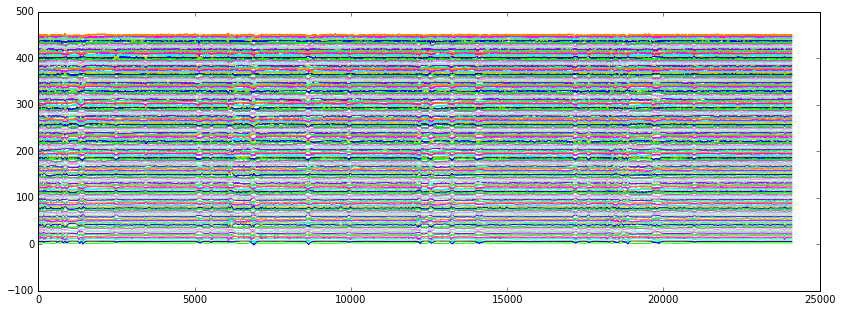

19
[ 0.0807208]
[ 0.00612204  0.00083189  0.00046216]
20
[ 0.10010684]
[  1.10354505e-04   1.45054100e-05   7.37297203e-06]
27
[ 0.10625379]
[ -6.80252277e-05   9.81535436e-06  -8.95972274e-06]
85
[ 0.10528356]
[  6.79548949e-06   4.21730327e-07  -2.27660247e-06]
87
[ 0.03170764]
[ -1.69738867e-06  -1.77958403e-06   2.00939110e-06]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:95: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:96: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:97: RuntimeWarning: invalid value encountered in divide


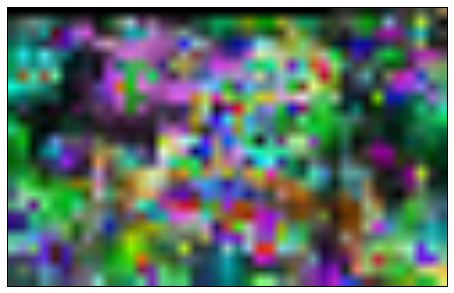

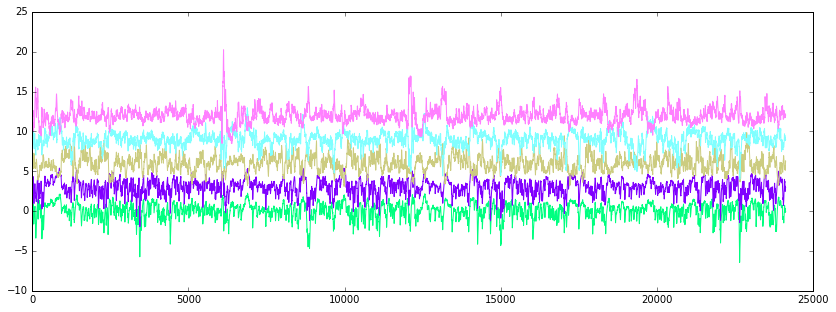

4
[ 0.20372292]
[  1.79699531e-04  -3.77676117e-05   7.01046099e-06]
11
[ 0.10706434]
[  2.97072980e-05  -1.01794390e-05  -6.95589719e-07]
40
[ 0.0983168]
[  1.39894668e-05  -6.73570053e-06  -6.69860090e-07]
76
[ 0.09064047]
[  5.02474681e-06  -1.27157102e-06   9.83463639e-07]


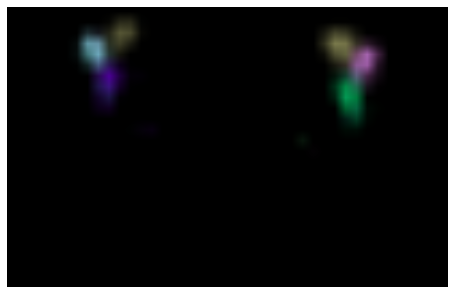

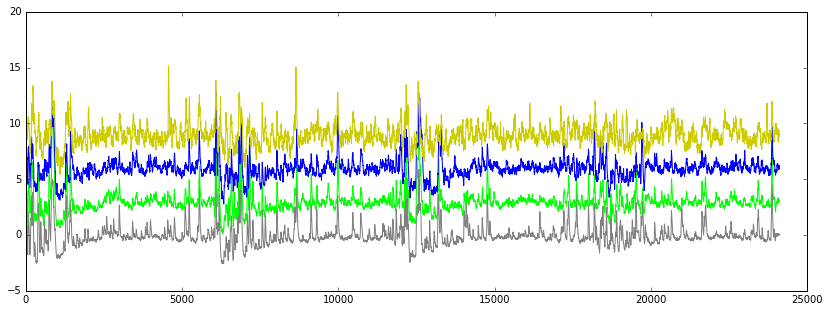

0
[ 0.0868241]
[ -5.12374751e-05  -1.28254589e-06  -1.22450180e-06]
2
[ 0.32342245]
[  7.81336049e-05  -1.47969903e-05   4.10198857e-06]
3
[ 0.46854793]
[  9.98842270e-05  -1.08197906e-05   3.66226874e-06]
7
[ 0.29408985]
[  9.95934370e-05  -8.59350516e-06   7.41394118e-06]
10
[ 0.01566797]
[ -1.24226147e-05  -7.19325807e-06   8.24195817e-06]
13
[ 0.01322348]
[  4.72344253e-06  -3.79058863e-06   4.57144033e-06]
15
[ 0.39936636]
[  5.66074460e-04  -3.43149692e-05   3.22939982e-05]
24
[ 0.18194178]
[  1.13000521e-04  -3.28905827e-05   5.21972657e-06]
25
[ 0.30512798]
[ -1.09187340e-03   2.68223847e-04  -8.81408340e-05]
30
[ 0.35308937]
[  3.53326171e-05  -4.25714190e-06   1.37374335e-06]
34
[ 0.04515204]
[ -2.75529874e-05  -9.51869020e-07   1.89675690e-06]
45
[ 0.34116791]
[ -6.74210907e-05   2.41387513e-06  -3.34459220e-06]
49
[ 0.09440854]
[  8.03235903e-05   7.90264873e-07  -3.51721998e-06]
53
[ 0.35972447]
[  2.61140594e-05  -3.34746306e-06   1.21273613e-06]
70
[ 0.50932284]
[ -1.060

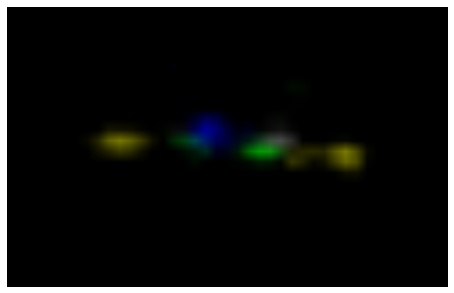

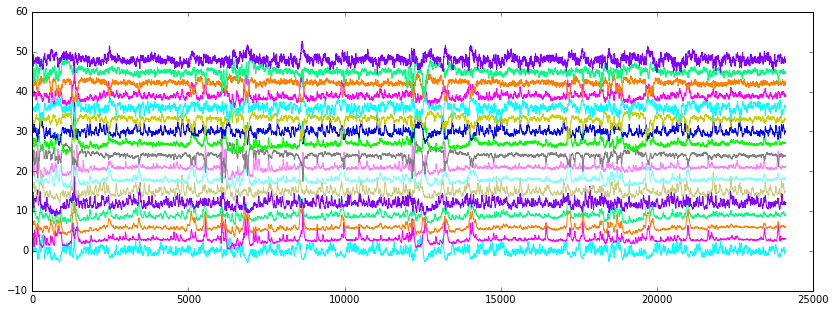

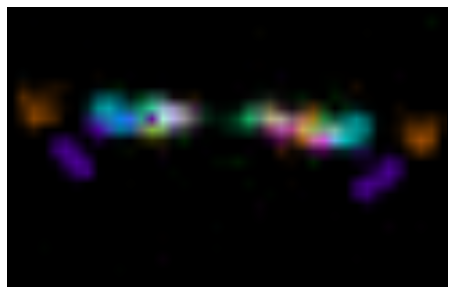

In [53]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([16,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
C1[13]=(0.2,0.5,0.5)
C1[14]=(0.5,0.2,0.5)
C1[15]=(0.5,0.5,0.2)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%12+1][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%15+1][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%12+1][:])
    print(Neworder[i])
    print(Rsq[:,Neworder[i]])
    print(Betas[:,Neworder[i]])
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
print(Neworder)

In [ ]:
plt.plot(Xkdff.T)